In [1]:
# =============================== WEb Scrabe ==================================

import pandas as pd
import numpy as np

import requests
from requests import get
from bs4 import BeautifulSoup

from time import sleep
from random import randint
import pandas as pd


# Creating the lists we want to write into
titles = []
years = []
time = []
imdb_ratings = []
metascores = []
votes = []
us_gross = []

headers = {'Accept-Language': 'en-US, en;q=0.5'}


# Storing each of the urls of 50 movies 
    # Getting the contents from the each url
page = requests.get('https://www.imdb.com/search/title/?genres=action&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=f11158cc-b50b-4c4d-b0a2-40b32863395b&pf_rd_r=XZ8X52H1R40B7KG5SNZ9&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_1', headers=headers)
soup = BeautifulSoup(page.text, 'html.parser')
pages = np.arange(1, 1001, 50)

# Storing each of the urls of 50 movies 
for page in pages:
    # Getting the contents from the each url
    page = requests.get('https://www.imdb.com/search/title/?groups=top_1000&start=' + str(page) + '&ref_=adv_nxt', headers=headers)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    # Aiming the part of the html we want to get the information from
    movie_div = soup.find_all('div', class_='lister-item mode-advanced')
    
    # Controling the loop’s rate by pausing the execution of the loop for a specified amount of time
    # Waiting time between requests for a number between 2-10 seconds
    sleep(randint(2,10))
    
    for container in movie_div:
        # Scraping the movie's name
        name = container.h3.a.text
        titles.append(name)
        
        # Scraping the movie's year
        year = container.h3.find('span', class_='lister-item-year').text
        years.append(year)
        
        # Scraping the movie's length
        runtime = container.find('span', class_='runtime').text if container.p.find('span', class_='runtime') else '-'
        time.append(runtime)
        
        # Scraping the rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
        
        # Scraping the metascore
        m_score = container.find('span', class_='metascore').text if container.find('span', class_='metascore') else '-'
        metascores.append(m_score)
        
        # Scraping votes and gross earnings
        nv = container.find_all('span', attrs={'name':'nv'})
        vote = nv[0].text
        votes.append(vote)
        grosses = nv[1].text if len(nv) > 1 else '-'
        us_gross.append(grosses)
    

movies = pd.DataFrame({'movie':titles,
                       'year':years,
                       'time_minute':time,
                       'imdb_rating':imdb_ratings,
                       'metascore':metascores,
                       'vote':votes,
                       'gross_earning':us_gross})
movies

,movie,year,time_minute,imdb_rating,metascore,vote,gross_earning
0,Oppenheimer,(2023),180 min,8.6,88,"319,528",#31
1,Guardians of the Galaxy Vol. 3,(2023),150 min,8.0,64,"266,957",-
2,Mission: Impossible - Dead Reckoning Part One,(2023),163 min,8.0,81,"119,985",-
3,Interstellar,(2014),169 min,8.7,74,"1,962,590",$188.02M
4,Spider-Man: Across the Spider-Verse,(2023),140 min,8.8,86,"208,453",#15
...,...,...,...,...,...,...,...
995,Special 26,(2013),144 min,8.0,-,"57,798",$1.08M
996,Paan Singh Tomar,(2012),135 min,8.2,-,"37,233",$0.04M
997,Drishyam,(2013),160 min,8.3,-,"42,904",-
998,Anand,(1971),122 min,8.1,-,"34,633",-


In [2]:
# *******************************************************************************************************

# ---------------------------------------- Phase 2: ----------------------------------------
    
import sqlite3
 
connection_obj = sqlite3.connect('Movietable1.db')
 
cursor_obj = connection_obj.cursor()
 
# ======= TABLE 1
 
# Creating table

table1 = """ CREATE TABLE Table11 (
            SNO INT(255) NOT NULL,
            MovieName VARCHAR(50) NOT NULL,
            Year VARCHAR(150) NOT NULL,
            Duration VARCHAR(50) NOT NULL,
            ratings VARCHAR(150) NOT NULL,
            MetaScore VARCHAR(150) NOT NULL,
           DirectorName VARCHAR(50) NOT NULL
        )"""


cursor_obj.execute(table1)

import pandas as pd
# Load CSV data into Pandas DataFrame
student = pd.read_csv('Data1.csv')
 
# Write the data to a sqlite db table
student.to_sql('Table1', connection_obj, if_exists='replace', index=False)
   
# Run select sql query
cursor_obj.execute('select * from Table1')
 
# Fetch all records
# as list of tuples
records = cursor_obj.fetchall()

print("----------------------------------------")
print("Table 1 created ")
print("----------------------------------------")
print() 
# Display result 
for row in records:
    # show row
    print(row)

----------------------------------------
Table 1 created 
----------------------------------------

(1, 'The Shawshank Redemption', '1994', '142 min', 9.3, 80.0, 'Frank Darabont')
(2, 'The Godfather', '1972', '175 min', 9.2, 100.0, 'Francis Ford Coppola')
(3, 'The Dark Knight', '2008', '152 min', 9.0, 84.0, 'Christopher')
(4, 'The Godfather: Part II', '1974', '202 min', 9.0, 90.0, 'Francis Ford Coppola')
(5, '12 Angry Men', '1957', '96 min', 9.0, 96.0, 'Sidney Lumet')
(6, 'The Lord of the Rings: The Return of the King', '2003', '201 min', 8.9, 94.0, 'Peter Jackson')
(7, 'Pulp Fiction', '1994', '154 min', 8.9, 94.0, 'Quentin Tarantino')
(8, "Schindler's List", '1993', '195 min', 8.9, 94.0, 'Steven Spielberg')
(9, 'Inception', '2010', '148 min', 8.8, 74.0, 'Christopher ')
(10, 'Fight Club', '1999', '139 min', 8.8, 66.0, 'David Fincher')
(11, 'The Lord of the Rings: The Fellowship of the Ring', '2001', '178 min', 8.8, 92.0, 'Peter Jackson')
(12, 'Forrest Gump', '1994', '142 min', 8.8, 82.

In [3]:
# ------------------- TABLE 2

# ============


table2 = """ CREATE TABLE Table12 (
            MovieName VARCHAR(50) NOT NULL,
            Certification VARCHAR(50) NOT NULL,
            Star1 VARCHAR(50) NOT NULL,
            Star2 VARCHAR(50) NOT NULL,
            Star3 VARCHAR(50) NOT NULL,
            Star4 VARCHAR(50) NOT NULL,
            Votes VARCHAR(50) NOT NULL,
            GrossCollection VARCHAR(50) NOT NULL,
            Popularity VARCHAR(50) NOT NULL,
            Genre VARCHAR(50) NOT NULL
        )"""
 
cursor_obj.execute(table2)

tab2 = pd.read_csv('Data2.csv')
 
# Write the data to a sqlite db table
tab2.to_sql('Table2', connection_obj, if_exists='replace', index=False)
   
# Run select sql query
cursor_obj.execute('select * from Table2')
 
# Fetch all records
# as list of tuples
records = cursor_obj.fetchall()

print("----------------------------------------")
print("Table 2 created ")
print("----------------------------------------")
print()  
# Display result 
for row in records:
    # show row
    print(row)

----------------------------------------
Table 2 created 
----------------------------------------

('The Shawshank Redemption', 'A', 'Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'William Sadler', 2343110, '2,83,41,469', 32.985763, 'Drama')
('The Godfather', 'A', 'Marlon Brando', 'Al Pacino', 'James Caan', 'Diane Keaton', 1620367, '13,49,66,411', 28.419936, 'Crime, Drama')
('The Dark Knight', 'UA', 'Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine', 2303232, '53,48,58,444', 13.112507, 'Action')
('The Godfather: Part II', 'A', 'Al Pacino', 'Robert De Niro', 'Robert Duvall', 'Diane Keaton', 1129952, '5,73,00,000', 11.173104, 'Crime, Drama')
('12 Angry Men', 'U', 'Henry Fonda', 'Lee J. Cobb', 'Martin Balsam', 'John Fiedler', 689845, '43,60,000', 9.335014, 'Crime, Drama')
('The Lord of the Rings: The Return of the King', 'U', 'Elijah Wood', 'Viggo Mortensen', 'Ian McKellen', 'Orlando Bloom', 1642758, '37,78,45,905', 9.1107, 'Action, Adventure, Drama')
('Pulp Fiction', 'A'

In [4]:
# -----------------------------------------------------------------
# -----------------------------------------------------------------

# === TABLE 1

print("---------------------------------------------------------------------------------------")
print("1)  Display all the details of movies created by directors Christopher and Matt Reeves.")
print("---------------------------------------------------------------------------------------")
print()

cursor_obj.execute("SELECT * FROM Table1 WHERE DirectorName = 'Christopher' ")



rec=cursor_obj.fetchall()


for director in rec:
    # show rowp
    print()
    print(director)

cursor_obj.execute("SELECT * FROM Table1 WHERE DirectorName = 'Matt Reeves'")

rec1=cursor_obj.fetchall()


for director1 in rec1:
    print()
    print(director1)

---------------------------------------------------------------------------------------
1)  Display all the details of movies created by directors Christopher and Matt Reeves.
---------------------------------------------------------------------------------------


(3, 'The Dark Knight', '2008', '152 min', 9.0, 84.0, 'Christopher')

(899, 'Dawn of the Planet of the Apes', '2014', '130 min', 7.6, 79.0, 'Matt Reeves')


In [5]:
# ========================================================================================= 3 
   
print("------------------------------------------------------------------------")
print("2) Display all details of movies with ratings above 7 in ascending order")
print("-------------------------------------------------------------------------")
   
 
cursor_obj.execute("SELECT * FROM Table1 ORDER BY Rating > 7 ASC")
   
rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director) 

------------------------------------------------------------------------
2) Display all details of movies with ratings above 7 in ascending order
-------------------------------------------------------------------------

(1, 'The Shawshank Redemption', '1994', '142 min', 9.3, 80.0, 'Frank Darabont')

(2, 'The Godfather', '1972', '175 min', 9.2, 100.0, 'Francis Ford Coppola')

(3, 'The Dark Knight', '2008', '152 min', 9.0, 84.0, 'Christopher')

(4, 'The Godfather: Part II', '1974', '202 min', 9.0, 90.0, 'Francis Ford Coppola')

(5, '12 Angry Men', '1957', '96 min', 9.0, 96.0, 'Sidney Lumet')

(6, 'The Lord of the Rings: The Return of the King', '2003', '201 min', 8.9, 94.0, 'Peter Jackson')

(7, 'Pulp Fiction', '1994', '154 min', 8.9, 94.0, 'Quentin Tarantino')

(8, "Schindler's List", '1993', '195 min', 8.9, 94.0, 'Steven Spielberg')

(9, 'Inception', '2010', '148 min', 8.8, 74.0, 'Christopher ')

(10, 'Fight Club', '1999', '139 min', 8.8, 66.0, 'David Fincher')

(11, 'The Lord of the 


(154, 'Rang De Basanti', '2006', '167 min', 8.2, None, 'Rakeysh Omprakash Mehra')

(155, 'Black', '2005', '122 min', 8.2, None, 'Sanjay Leela Bhansali')

(156, 'Batman Begins', '2005', '140 min', 8.2, 70.0, 'Christopher ')

(157, 'Swades: We, the People', '2004', '210 min', 8.2, None, 'Ashutosh Gowariker')

(158, 'Der Untergang', '2004', '156 min', 8.2, 82.0, 'Oliver Hirschbiegel')

(159, 'Hauru no ugoku shiro', '2004', '119 min', 8.2, 80.0, 'Hayao Miyazaki')

(160, 'A Beautiful Mind', '2001', '135 min', 8.2, 72.0, 'Ron Howard')

(161, 'Hera Pheri', '2000', '156 min', 8.2, None, 'Priyadarshan')

(162, 'Lock, Stock and Two Smoking Barrels', '1998', '107 min', 8.2, 66.0, 'Guy Ritchie')

(163, 'L.A. Confidential', '1997', '138 min', 8.2, 90.0, 'Curtis Hanson')

(164, 'Eskiya', '1996', '128 min', 8.2, None, 'Yavuz Turgul')

(165, 'Heat', '1995', '170 min', 8.2, 76.0, 'Michael Mann')

(166, 'Casino', '1995', '178 min', 8.2, 73.0, 'Martin Scorsese')

(167, 'Andaz Apna Apna', '1994', '160 mi

(956, 'The Thin Red Line', '1998', '170 min', 7.6, 78.0, 'Terrence Malick')

(957, 'Mulan', '1998', '88 min', 7.6, 71.0, 'Tony Bancroft')

(958, 'Fear and Loathing in Las Vegas', '1998', '118 min', 7.6, 41.0, 'Terry Gilliam')

(959, 'Funny Games', '1997', '108 min', 7.6, 69.0, 'Michael Haneke')

(960, 'Dark City', '1998', '100 min', 7.6, 66.0, 'Alex Proyas')

(961, 'Sleepers', '1996', '147 min', 7.6, 49.0, 'Barry Levinson')

(962, 'Lost Highway', '1997', '134 min', 7.6, 52.0, 'David Lynch')

(963, 'Sense and Sensibility', '1995', '136 min', 7.6, 84.0, 'Ang Lee')

(964, 'Die Hard: With a Vengeance', '1995', '128 min', 7.6, 58.0, 'John McTiernan')

(965, 'Dead Man', '1995', '121 min', 7.6, 62.0, 'Jim Jarmusch')

(966, 'The Bridges of Madison County', '1995', '135 min', 7.6, 69.0, 'Clint Eastwood')

(967, 'Apollo 13', 'PG', '140 min', 7.6, 77.0, 'Ron Howard')

(968, 'Trois couleurs: Blanc', '1994', '92 min', 7.6, 88.0, 'Krzysztof Kieslowski')

(969, 'Falling Down', '1993', '113 min', 7.6,

In [6]:
# ========================================================================================= 3 
    
print("------------------------------------------------------------------------")
print("3) Display all the details of movies with a duration of 140 minutes to 190 minutes.")
print("-------------------------------------------------------------------------")  
    
    
cursor_obj.execute( "SELECT * FROM Table1 WHERE Duration > 140 AND Duration <= 190")

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director) 

------------------------------------------------------------------------
3) Display all the details of movies with a duration of 140 minutes to 190 minutes.
-------------------------------------------------------------------------

(1, 'The Shawshank Redemption', '1994', '142 min', 9.3, 80.0, 'Frank Darabont')

(2, 'The Godfather', '1972', '175 min', 9.2, 100.0, 'Francis Ford Coppola')

(3, 'The Dark Knight', '2008', '152 min', 9.0, 84.0, 'Christopher')

(7, 'Pulp Fiction', '1994', '154 min', 8.9, 94.0, 'Quentin Tarantino')

(9, 'Inception', '2010', '148 min', 8.8, 74.0, 'Christopher ')

(11, 'The Lord of the Rings: The Fellowship of the Ring', '2001', '178 min', 8.8, 92.0, 'Peter Jackson')

(12, 'Forrest Gump', '1994', '142 min', 8.8, 82.0, 'Robert Zemeckis')

(13, 'Il buono, il brutto, il cattivo', '1966', '161 min', 8.8, 90.0, 'Sergio Leone')

(14, 'The Lord of the Rings: The Two Towers', '2002', '179 min', 8.7, 87.0, 'Peter Jackson')

(16, 'Goodfellas', '1990', '146 min', 8.7, 90.0

In [7]:
# ========================================================================================= 3 
   
print("-----------------------------------------------")
print("4) Display all movie names in descending order")
print("------------------------------------------------")
   
    
cursor_obj.execute("SELECT * FROM Table1 ORDER BY MovieName DESC")
   
    

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director)      

-----------------------------------------------
4) Display all movie names in descending order
------------------------------------------------

(212, 'Ôkami kodomo no Ame to Yuki', '2012', '117 min', 8.1, 71.0, 'Mamoru Hosoda')

(709, 'À bout de souffle', '1960', '90 min', 7.8, None, 'Jean-Luc Godard')

(773, 'Zwartboek', '2006', '145 min', 7.7, 71.0, 'Paul Verhoeven')

(861, 'Zulu', '1964', '138 min', 7.7, 77.0, 'Cy Endfield')

(331, 'Zootopia', '2016', '108 min', 8.0, 78.0, 'Byron Howard')

(913, 'Zombieland', '2009', '88 min', 7.6, 73.0, 'Ruben Fleischer')

(768, 'Zodiac', '2007', '157 min', 7.7, 78.0, 'David Fincher')

(222, 'Zindagi Na Milegi Dobara', '2011', '155 min', 8.1, None, 'Zoya Akhtar')

(283, 'Zerkalo', '1975', '107 min', 8.1, None, 'Andrei Tarkovsky')

(838, 'Zelig', '1983', '79 min', 7.7, None, 'Woody Allen')

(182, 'Yôjinbô', '1961', '110 min', 8.2, None, 'Akira Kurosawa')

(418, 'Young Frankenstein', '1974', '106 min', 8.0, 80.0, 'Mel Brooks')

(352, 'Yip Man', '200


(483, 'Edge of Tomorrow', '2014', '113 min', 7.9, 71.0, 'Doug Liman')

(658, 'Ed Wood', '1994', '127 min', 7.8, 70.0, 'Tim Burton')

(919, 'Eastern Promises', '2007', '100 min', 7.6, 82.0, 'David Cronenberg')

(555, 'East of Eden', '1955', '118 min', 7.9, 72.0, 'Elia Kazan')

(689, 'E.T. the Extra-Terrestrial', '1982', '115 min', 7.8, 91.0, 'Steven Spielberg')

(266, 'Dà hóng denglong gaogao guà', '1991', '125 min', 8.1, None, 'Yimou Zhang')

(574, 'Dunkirk', '2017', '106 min', 7.8, 94.0, 'Christopher ')

(718, 'Duck Soup', '1933', '69 min', 7.8, 93.0, 'Leo McCarey')

(187, 'Du rififi chez les hommes', '1955', '118 min', 8.2, 97.0, 'Jules Dassin')

(614, 'Druk', '2020', '117 min', 7.8, 81.0, 'Thomas Vinterberg')

(622, 'Drive', '2011', '100 min', 7.8, 78.0, 'Nicolas Winding Refn')

(88, 'Drishyam', '2013', '160 min', 8.3, None, 'Jeethu Joseph')

(137, 'Drishyam', '2015', '163 min', 8.2, None, 'Nishikant Kamat')

(79, 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bom

In [8]:
# ========================================================================================= 3 

print("---------------------------------------------------------------------")
print("5) Display movie name starts with ‘P’ and their rating is greater than 7")    
print("-----------------------------------------------------------------------")
    
cursor_obj.execute("SELECT * FROM Table1 WHERE MovieName Like'P%' and Rating > 7")
   
    

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director)    
            

---------------------------------------------------------------------
5) Display movie name starts with ‘P’ and their rating is greater than 7
-----------------------------------------------------------------------

(7, 'Pulp Fiction', '1994', '154 min', 8.9, 94.0, 'Quentin Tarantino')

(50, 'Psycho', '1960', '109 min', 8.5, 97.0, 'Alfred Hitchcock')

(81, 'Paths of Glory', '1957', '88 min', 8.4, 90.0, 'Stanley Kubrick')

(116, 'Per qualche dollaro in più', '1965', '132 min', 8.3, 74.0, 'Sergio Leone')

(143, 'Paan Singh Tomar', '2012', '135 min', 8.2, None, 'Tigmanshu Dhulia')

(151, "Pan's Labyrinth", '2006', '118 min', 8.2, 98.0, 'Guillermo del Toro')

(196, 'Portrait de la jeune fille en feu', '2019', '122 min', 8.1, 95.0, 'Céline Sciamma')

(197, 'Pink', '2016', '136 min', 8.1, None, 'Aniruddha Roy Chowdhury')

(208, 'PK', '2014', '153 min', 8.1, None, 'Rajkumar Hirani')

(223, 'Prisoners', '2013', '153 min', 8.1, 70.0, 'Denis Villeneuve')

(269, 'Platoon', '1986', '120 min', 8.1,

In [9]:
# ========================================================================================= 3 

print("---------------------------------------------------------------------")
print("5) Display movie name starts with ‘P’ and their rating is greater than 7")    
print("-----------------------------------------------------------------------")
    
cursor_obj.execute("SELECT * FROM Table1 WHERE MovieName Like'P%' and Rating > 7")
   
    

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director)    
            

---------------------------------------------------------------------
5) Display movie name starts with ‘P’ and their rating is greater than 7
-----------------------------------------------------------------------

(7, 'Pulp Fiction', '1994', '154 min', 8.9, 94.0, 'Quentin Tarantino')

(50, 'Psycho', '1960', '109 min', 8.5, 97.0, 'Alfred Hitchcock')

(81, 'Paths of Glory', '1957', '88 min', 8.4, 90.0, 'Stanley Kubrick')

(116, 'Per qualche dollaro in più', '1965', '132 min', 8.3, 74.0, 'Sergio Leone')

(143, 'Paan Singh Tomar', '2012', '135 min', 8.2, None, 'Tigmanshu Dhulia')

(151, "Pan's Labyrinth", '2006', '118 min', 8.2, 98.0, 'Guillermo del Toro')

(196, 'Portrait de la jeune fille en feu', '2019', '122 min', 8.1, 95.0, 'Céline Sciamma')

(197, 'Pink', '2016', '136 min', 8.1, None, 'Aniruddha Roy Chowdhury')

(208, 'PK', '2014', '153 min', 8.1, None, 'Rajkumar Hirani')

(223, 'Prisoners', '2013', '153 min', 8.1, 70.0, 'Denis Villeneuve')

(269, 'Platoon', '1986', '120 min', 8.1,

In [10]:
# -----------------------------------------------------------------
# -----------------------------------------------------------------

# === TABLE 1

print("---------------------------------------------------------------------------------------")
print("1)  Display all the details of movies created by directors Christopher and Matt Reeves.")
print("---------------------------------------------------------------------------------------")
print()

cursor_obj.execute("SELECT * FROM Table1 WHERE DirectorName = 'Christopher' ")



rec=cursor_obj.fetchall()


for director in rec:
    # show rowp
    print()
    print(director)

cursor_obj.execute("SELECT * FROM Table1 WHERE DirectorName = 'Matt Reeves'")

rec1=cursor_obj.fetchall()


for director1 in rec1:
    print()
    print(director1)

---------------------------------------------------------------------------------------
1)  Display all the details of movies created by directors Christopher and Matt Reeves.
---------------------------------------------------------------------------------------


(3, 'The Dark Knight', '2008', '152 min', 9.0, 84.0, 'Christopher')

(899, 'Dawn of the Planet of the Apes', '2014', '130 min', 7.6, 79.0, 'Matt Reeves')


In [11]:
# ========================================================================================= 3 
   
print("------------------------------------------------------------------------")
print("2) Display all details of movies with ratings above 7 in ascending order")
print("-------------------------------------------------------------------------")
   
 
cursor_obj.execute("SELECT * FROM Table1 ORDER BY Rating > 7 ASC")
   
rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director) 

------------------------------------------------------------------------
2) Display all details of movies with ratings above 7 in ascending order
-------------------------------------------------------------------------

(1, 'The Shawshank Redemption', '1994', '142 min', 9.3, 80.0, 'Frank Darabont')

(2, 'The Godfather', '1972', '175 min', 9.2, 100.0, 'Francis Ford Coppola')

(3, 'The Dark Knight', '2008', '152 min', 9.0, 84.0, 'Christopher')

(4, 'The Godfather: Part II', '1974', '202 min', 9.0, 90.0, 'Francis Ford Coppola')

(5, '12 Angry Men', '1957', '96 min', 9.0, 96.0, 'Sidney Lumet')

(6, 'The Lord of the Rings: The Return of the King', '2003', '201 min', 8.9, 94.0, 'Peter Jackson')

(7, 'Pulp Fiction', '1994', '154 min', 8.9, 94.0, 'Quentin Tarantino')

(8, "Schindler's List", '1993', '195 min', 8.9, 94.0, 'Steven Spielberg')

(9, 'Inception', '2010', '148 min', 8.8, 74.0, 'Christopher ')

(10, 'Fight Club', '1999', '139 min', 8.8, 66.0, 'David Fincher')

(11, 'The Lord of the 


(187, 'Du rififi chez les hommes', '1955', '118 min', 8.2, 97.0, 'Jules Dassin')

(188, 'Dial M for Murder', '1954', '105 min', 8.2, 75.0, 'Alfred Hitchcock')

(189, 'Tôkyô monogatari', '1953', '136 min', 8.2, None, 'Yasujirô Ozu')

(190, 'Rashômon', '1950', '88 min', 8.2, 98.0, 'Akira Kurosawa')

(191, 'All About Eve', '1950', '138 min', 8.2, 98.0, 'Joseph L. Mankiewicz')

(192, 'The Treasure of the Sierra Madre', '1948', '126 min', 8.2, 98.0, 'John Huston')

(193, 'To Be or Not to Be', '1942', '99 min', 8.2, 86.0, 'Ernst Lubitsch')

(194, 'The Gold Rush', '1925', '95 min', 8.2, None, 'Charles Chaplin')

(195, 'Sherlock Jr.', '1924', '45 min', 8.2, None, 'Buster Keaton')

(196, 'Portrait de la jeune fille en feu', '2019', '122 min', 8.1, 95.0, 'Céline Sciamma')

(197, 'Pink', '2016', '136 min', 8.1, None, 'Aniruddha Roy Chowdhury')

(198, 'Koe no katachi', '2016', '130 min', 8.1, 78.0, 'Naoko Yamada')

(199, 'Contratiempo', '2016', '106 min', 8.1, None, 'Oriol Paulo')

(200, 'Ah-ga-s


(415, 'Annie Hall', '1977', '93 min', 8.0, 92.0, 'Woody Allen')

(416, 'Jaws', '1975', '124 min', 8.0, 87.0, 'Steven Spielberg')

(417, 'Dog Day Afternoon', '1975', '125 min', 8.0, 86.0, 'Sidney Lumet')

(418, 'Young Frankenstein', '1974', '106 min', 8.0, 80.0, 'Mel Brooks')

(419, 'Papillon', '1973', '151 min', 8.0, 58.0, 'Franklin J. Schaffner')

(420, 'The Exorcist', '1973', '122 min', 8.0, 81.0, 'William Friedkin')

(421, 'Sleuth', '1972', '138 min', 8.0, None, 'Joseph L. Mankiewicz')

(422, 'The Last Picture Show', '1971', '118 min', 8.0, 93.0, 'Peter Bogdanovich')

(423, 'Fiddler on the Roof', '1971', '181 min', 8.0, 67.0, 'Norman Jewison')

(424, 'Il conformista', '1970', '113 min', 8.0, 100.0, 'Bernardo Bertolucci')

(425, 'Butch Cassidy and the Sundance Kid', '1969', '110 min', 8.0, 66.0, 'George Roy Hill')

(426, "Rosemary's Baby", '1968', '137 min', 8.0, 96.0, 'Roman Polanski')

(427, 'Planet of the Apes', '1968', '112 min', 8.0, 79.0, 'Franklin J. Schaffner')

(428, 'The G

(577, 'Paddington 2', '2017', '103 min', 7.8, 88.0, 'Paul King')

(578, 'Udta Punjab', '2016', '148 min', 7.8, None, 'Abhishek Chaubey')

(579, 'Kubo and the Two Strings', '2016', '101 min', 7.8, 84.0, 'Travis Knight')

(580, 'M.S. Dhoni: The Untold Story', '2016', '184 min', 7.8, None, 'Neeraj Pandey')

(581, 'Manchester by the Sea', '2016', '137 min', 7.8, 96.0, 'Kenneth Lonergan')

(582, 'Under sandet', '2015', '100 min', 7.8, 75.0, 'Martin Zandvliet')

(583, 'Rogue One', '2016', '133 min', 7.8, 65.0, 'Gareth Edwards')

(584, 'Captain America: Civil War', '2016', '147 min', 7.8, 75.0, 'Anthony Russo')

(585, 'The Hateful Eight', '2015', '168 min', 7.8, 68.0, 'Quentin Tarantino')

(586, 'Little Women', '2019', '135 min', 7.8, 91.0, 'Greta Gerwig')

(587, 'Loving Vincent', '2017', '94 min', 7.8, 62.0, 'Dorota Kobiela')

(588, 'Pride', '2014', '119 min', 7.8, 79.0, 'Matthew Warchus')

(589, 'Le passé', '2013', '130 min', 7.8, 85.0, 'Asghar Farhadi')

(590, 'La grande bellezza', '2013',

(715, 'The Lady Vanishes', '1938', '96 min', 7.8, 98.0, 'Alfred Hitchcock')

(716, 'Bringing Up Baby', '1938', '102 min', 7.8, 91.0, 'Howard Hawks')

(717, 'Bride of Frankenstein', '1935', '75 min', 7.8, 95.0, 'James Whale')

(718, 'Duck Soup', '1933', '69 min', 7.8, 93.0, 'Leo McCarey')

(719, 'Scarface: The Shame of the Nation', '1932', '93 min', 7.8, 87.0, 'Howard Hawks')

(720, 'Frankenstein', '1931', '70 min', 7.8, 91.0, 'James Whale')

(721, 'Roma', '2018', '135 min', 7.7, 96.0, 'Alfonso Cuarón')

(722, "God's Own Country", '2017', '104 min', 7.7, 85.0, 'Francis Lee')

(723, 'Deadpool 2', '2018', '119 min', 7.7, 66.0, 'David Leitch')

(724, 'Wind River', '2017', '107 min', 7.7, 73.0, 'Taylor Sheridan')

(725, 'Get Out', '2017', '104 min', 7.7, 85.0, 'Jordan Peele')

(726, 'Mission: Impossible - Fallout', '2018', '147 min', 7.7, 86.0, 'Christopher ')

(727, 'En man som heter Ove', '2015', '116 min', 7.7, 70.0, 'Hannes Holm')

(728, 'What We Do in the Shadows', '2014', '86 min', 7.


(991, 'Giù la testa', '1971', '157 min', 7.6, 77.0, 'Sergio Leone')

(992, "Kelly's Heroes", '1970', '144 min', 7.6, 50.0, 'Brian G. Hutton')

(993, 'The Jungle Book', '1967', '78 min', 7.6, 65.0, 'Wolfgang Reitherman')

(994, 'Blowup', '1966', '111 min', 7.6, 82.0, 'Michelangelo Antonioni')

(995, "A Hard Day's Night", '1964', '87 min', 7.6, 96.0, 'Richard Lester')

(996, "Breakfast at Tiffany's", '1961', '115 min', 7.6, 76.0, 'Blake Edwards')

(997, 'Giant', '1956', '201 min', 7.6, 84.0, 'George Stevens')

(998, 'From Here to Eternity', '1953', '118 min', 7.6, 85.0, 'Fred Zinnemann')

(999, 'Lifeboat', '1944', '97 min', 7.6, 78.0, 'Alfred Hitchcock')

(1000, 'The 39 Steps', '1935', '86 min', 7.6, 93.0, 'Alfred Hitchcock')


In [12]:
# ========================================================================================= 3 
    
print("------------------------------------------------------------------------")
print("3) Display all the details of movies with a duration of 140 minutes to 190 minutes.")
print("-------------------------------------------------------------------------")  
    
    
cursor_obj.execute( "SELECT * FROM Table1 WHERE Duration > 140 AND Duration <= 190")

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director) 

------------------------------------------------------------------------
3) Display all the details of movies with a duration of 140 minutes to 190 minutes.
-------------------------------------------------------------------------

(1, 'The Shawshank Redemption', '1994', '142 min', 9.3, 80.0, 'Frank Darabont')

(2, 'The Godfather', '1972', '175 min', 9.2, 100.0, 'Francis Ford Coppola')

(3, 'The Dark Knight', '2008', '152 min', 9.0, 84.0, 'Christopher')

(7, 'Pulp Fiction', '1994', '154 min', 8.9, 94.0, 'Quentin Tarantino')

(9, 'Inception', '2010', '148 min', 8.8, 74.0, 'Christopher ')

(11, 'The Lord of the Rings: The Fellowship of the Ring', '2001', '178 min', 8.8, 92.0, 'Peter Jackson')

(12, 'Forrest Gump', '1994', '142 min', 8.8, 82.0, 'Robert Zemeckis')

(13, 'Il buono, il brutto, il cattivo', '1966', '161 min', 8.8, 90.0, 'Sergio Leone')

(14, 'The Lord of the Rings: The Two Towers', '2002', '179 min', 8.7, 87.0, 'Peter Jackson')

(16, 'Goodfellas', '1990', '146 min', 8.7, 90.0

In [13]:
# ========================================================================================= 3 
   
print("-----------------------------------------------")
print("4) Display all movie names in descending order")
print("------------------------------------------------")
   
    
cursor_obj.execute("SELECT * FROM Table1 ORDER BY MovieName DESC")
   
    

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director)      
    

-----------------------------------------------
4) Display all movie names in descending order
------------------------------------------------

(212, 'Ôkami kodomo no Ame to Yuki', '2012', '117 min', 8.1, 71.0, 'Mamoru Hosoda')

(709, 'À bout de souffle', '1960', '90 min', 7.8, None, 'Jean-Luc Godard')

(773, 'Zwartboek', '2006', '145 min', 7.7, 71.0, 'Paul Verhoeven')

(861, 'Zulu', '1964', '138 min', 7.7, 77.0, 'Cy Endfield')

(331, 'Zootopia', '2016', '108 min', 8.0, 78.0, 'Byron Howard')

(913, 'Zombieland', '2009', '88 min', 7.6, 73.0, 'Ruben Fleischer')

(768, 'Zodiac', '2007', '157 min', 7.7, 78.0, 'David Fincher')

(222, 'Zindagi Na Milegi Dobara', '2011', '155 min', 8.1, None, 'Zoya Akhtar')

(283, 'Zerkalo', '1975', '107 min', 8.1, None, 'Andrei Tarkovsky')

(838, 'Zelig', '1983', '79 min', 7.7, None, 'Woody Allen')

(182, 'Yôjinbô', '1961', '110 min', 8.2, None, 'Akira Kurosawa')

(418, 'Young Frankenstein', '1974', '106 min', 8.0, 80.0, 'Mel Brooks')

(352, 'Yip Man', '200

(607, 'Straight Outta Compton', '2015', '147 min', 7.8, 72.0, 'F. Gary Gray')

(920, 'Stardust', '2007', '127 min', 7.6, 66.0, 'Matthew Vaughn')

(478, 'Star Wars: Episode VII - The Force Awakens', '2015', '138 min', 7.9, 80.0, 'J.J. Abrams')

(110, 'Star Wars: Episode VI - Return of the Jedi', '1983', '131 min', 8.3, 58.0, 'Richard Marquand')

(17, 'Star Wars: Episode V - The Empire Strikes Back', '1980', '124 min', 8.7, 82.0, 'Irvin Kershner')

(30, 'Star Wars', '1977', '121 min', 8.6, 90.0, 'George Lucas')

(747, 'Star Trek Into Darkness', '2013', '132 min', 7.7, 72.0, 'J.J. Abrams')

(840, 'Star Trek II: The Wrath of Khan', '1982', '113 min', 7.7, 67.0, 'Nicholas Meyer')

(494, 'Star Trek', '2009', '127 min', 7.9, 82.0, 'J.J. Abrams')

(268, 'Stand by Me', '1986', '89 min', 8.1, 75.0, 'Rob Reiner')

(175, 'Stalker', '1979', '162 min', 8.2, None, 'Andrei Tarkovsky')

(446, 'Stalag 17', '1953', '120 min', 8.0, 84.0, 'Billy Wilder')

(714, 'Stagecoach', '1939', '96 min', 7.8, 93.0, 'J

(172, 'Die Hard', '1988', '132 min', 8.2, 72.0, 'John McTiernan')

(639, 'Diarios de motocicleta', '2004', '126 min', 7.8, 75.0, 'Walter Salles')

(188, 'Dial M for Murder', '1954', '105 min', 8.2, 75.0, 'Alfred Hitchcock')

(351, 'Dev.D', '2009', '144 min', 8.0, None, 'Anurag Kashyap')

(743, 'Detachment', '2011', '98 min', 7.7, 52.0, 'Tony Kaye')

(186, 'Det sjunde inseglet', '1957', '96 min', 8.2, 88.0, 'Ingmar Bergman')

(907, 'Despicable Me', '2010', '95 min', 7.6, 72.0, 'Pierre Coffin')

(158, 'Der Untergang', '2004', '156 min', 8.2, 82.0, 'Oliver Hirschbiegel')

(834, 'Der Name der Rose', '1986', '130 min', 7.7, 54.0, 'Jean-Jacques Annaud')

(408, 'Der Himmel über Berlin', '1987', '128 min', 8.0, 79.0, 'Wim Wenders')

(852, 'Deliverance', '1972', '109 min', 7.7, 80.0, 'John Boorman')

(973, 'Delicatessen', '1991', '99 min', 7.6, 66.0, 'Marc Caro')

(763, 'Death Note: Desu nôto', '2006', '126 min', 7.7, None, 'Shûsuke Kaneko')

(723, 'Deadpool 2', '2018', '119 min', 7.7, 66.0, 'D

In [14]:
# ========================================================================================= 3 

print("---------------------------------------------------------------------")
print("5) Display movie name starts with ‘P’ and their rating is greater than 7")    
print("-----------------------------------------------------------------------")
    
cursor_obj.execute("SELECT * FROM Table1 WHERE MovieName Like'P%' and Rating > 7")
   
    

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director)    
            

---------------------------------------------------------------------
5) Display movie name starts with ‘P’ and their rating is greater than 7
-----------------------------------------------------------------------

(7, 'Pulp Fiction', '1994', '154 min', 8.9, 94.0, 'Quentin Tarantino')

(50, 'Psycho', '1960', '109 min', 8.5, 97.0, 'Alfred Hitchcock')

(81, 'Paths of Glory', '1957', '88 min', 8.4, 90.0, 'Stanley Kubrick')

(116, 'Per qualche dollaro in più', '1965', '132 min', 8.3, 74.0, 'Sergio Leone')

(143, 'Paan Singh Tomar', '2012', '135 min', 8.2, None, 'Tigmanshu Dhulia')

(151, "Pan's Labyrinth", '2006', '118 min', 8.2, 98.0, 'Guillermo del Toro')

(196, 'Portrait de la jeune fille en feu', '2019', '122 min', 8.1, 95.0, 'Céline Sciamma')

(197, 'Pink', '2016', '136 min', 8.1, None, 'Aniruddha Roy Chowdhury')

(208, 'PK', '2014', '153 min', 8.1, None, 'Rajkumar Hirani')

(223, 'Prisoners', '2013', '153 min', 8.1, 70.0, 'Denis Villeneuve')

(269, 'Platoon', '1986', '120 min', 8.1,

In [15]:
# -------------------------------------------------------------------------
# -------------------------------------------------------------------------

# === TABLE 2

print("-----------------------------------------------------------------------")
print("1)  Display all movie names with start Arnold Schwarzenegger in ascending order.")
print("-----------------------------------------------------------------------")

cursor_obj.execute("SELECT * FROM Table2 ORDER BY MovieName = 'Star Trek' ASC")
   
    
rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director)     

-----------------------------------------------------------------------
1)  Display all movie names with start Arnold Schwarzenegger in ascending order.
-----------------------------------------------------------------------

('The Shawshank Redemption', 'A', 'Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'William Sadler', 2343110, '2,83,41,469', 32.985763, 'Drama')

('The Godfather', 'A', 'Marlon Brando', 'Al Pacino', 'James Caan', 'Diane Keaton', 1620367, '13,49,66,411', 28.419936, 'Crime, Drama')

('The Dark Knight', 'UA', 'Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine', 2303232, '53,48,58,444', 13.112507, 'Action')

('The Godfather: Part II', 'A', 'Al Pacino', 'Robert De Niro', 'Robert Duvall', 'Diane Keaton', 1129952, '5,73,00,000', 11.173104, 'Crime, Drama')

('12 Angry Men', 'U', 'Henry Fonda', 'Lee J. Cobb', 'Martin Balsam', 'John Fiedler', 689845, '43,60,000', 9.335014, 'Crime, Drama')

('The Lord of the Rings: The Return of the King', 'U', 'Elijah Wood', 'V


('Wreck-It Ralph', 'U', 'John C. Reilly', 'Jack McBrayer', 'Jane Lynch', 'Sarah Silverman', 380195, '18,94,22,889', 1.3155, 'Animation, Adventure, Comedy')

('Le Petit Prince', 'PG', 'Jeff Bridges', 'Mackenzie Foy', 'Rachel McAdams', 'Marion Cotillard', 56720, '13,39,152', 1.312103, 'Animation, Adventure, Drama')

('Detachment', None, 'Adrien Brody', 'Christina Hendricks', 'Marcia Gay Harden', 'Lucy Liu', 77071, '71,177', 1.304588, 'Drama')

('Midnight in Paris', 'PG-13', 'Owen Wilson', 'Rachel McAdams', 'Kathy Bates', 'Kurt Fuller', 388089, '5,68,16,662', 1.240895, 'Comedy, Fantasy, Romance')

('The Lego Movie', 'U', 'Phil Lord', 'Chris Pratt', 'Will Ferrell', 'Elizabeth Banks', 323982, '25,77,60,692', 1.220073, 'Animation, Action, Adventure')

('Gravity', 'UA', 'Sandra Bullock', 'George Clooney', 'Ed Harris', 'Orto Ignatiussen', 769145, '27,40,92,705', 1.214094, 'Drama, Sci-Fi, Thriller')

('Star Trek Into Darkness', 'UA', 'Chris Pine', 'Zachary Quinto', 'Zoe Saldana', 'Benedict Cum

In [16]:
print("-----------------------------------------------------------------------")
print("2)  Display all details of the movie with the highest number of votes.")
print("-----------------------------------------------------------------------")
    
cursor_obj.execute("SELECT max(Votes) from Table2")

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director)     
    

-----------------------------------------------------------------------
2)  Display all details of the movie with the highest number of votes.
-----------------------------------------------------------------------

(2343110,)


In [17]:
print("-----------------------------------------------------------------------")
print("3) Display movie names with gross collections in descending order.")
print("-----------------------------------------------------------------------")


cursor_obj.execute("SELECT MovieName , Gross FROM Table2 ORDER BY MovieName DESC")

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director)     
    

-----------------------------------------------------------------------
3) Display movie names with gross collections in descending order.
-----------------------------------------------------------------------

('Ôkami kodomo no Ame to Yuki', '0')

('À bout de souffle', '3,36,705')

('Zwartboek', '43,98,392')

('Zulu', '0')

('Zootopia', '34,12,68,248')

('Zombieland', '7,55,90,286')

('Zodiac', '3,30,80,084')

('Zindagi Na Milegi Dobara', '31,08,485')

('Zerkalo', '1,77,345')

('Zelig', '1,17,98,616')

('Yôjinbô', '0')

('Young Frankenstein', '8,63,00,000')

('Yip Man', '0')

('Ying xiong', '5,37,10,019')

('Yeopgijeogin geunyeo', '0')

('Y tu mamá también', '1,36,22,333')

('X: First Class', '14,64,08,305')

('X-Men: Days of Future Past', '23,39,21,534')

('Wreck-It Ralph', '18,94,22,889')

('Wonder', '13,24,22,809')

('Wo hu cang long', '12,80,78,872')

('Witness for the Prosecution', '81,75,000')

('Withnail & I', '15,44,889')

('Wind River', '3,38,00,859')

('Willy Wonka & the Ch

('Fiddler on the Roof', '8,05,00,000')

('Festen', '16,47,780')

("Ferris Bueller's Day Off", '7,01,36,369')

('Fear and Loathing in Las Vegas', '1,06,80,275')

('Fargo', '2,46,11,975')

('Fantastic Mr. Fox', '2,10,02,919')

('Fantasia', '7,64,08,097')

('Fanny och Alexander', '49,71,340')

('Falling Down', '4,09,03,593')

('Fa yeung nin wah', '27,34,044')

('Ex Machina', '2,54,42,958')

('Evil Dead II', '59,23,044')

('Eternal Sunshine of the Spotless Mind', '3,44,00,301')

('Eskiya', '0')

('Escape from Alcatraz', '4,30,00,000')

('Enter the Dragon', '2,50,00,000')

('English Vinglish', '16,70,773')

('Enemy at the Gates', '5,14,01,758')

('End of Watch', '4,10,03,371')

('En man som heter Ove', '33,58,518')

('Empire of the Sun', '2,22,38,696')

('El ángel exterminador', '0')

('El secreto de sus ojos', '63,91,436')

('El cuerpo', '0')

('Efter brylluppet', '4,12,544')

('Edward Scissorhands', '5,63,62,352')

('Edge of Tomorrow', '10,02,06,256')

('Ed Wood', '58,87,457')

('Eastern 

In [18]:
print("-----------------------------------------------------------------------")
print("4) Display the gross collection of movies with the star Arnold..")
print("-----------------------------------------------------------------------")


cursor_obj.execute("SELECT Gross FROM Table2 ORDER BY MovieName = 'A Star Is Born'")

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director) 

-----------------------------------------------------------------------
4) Display the gross collection of movies with the star Arnold..
-----------------------------------------------------------------------

('2,83,41,469',)

('13,49,66,411',)

('53,48,58,444',)

('5,73,00,000',)

('43,60,000',)

('37,78,45,905',)

('10,79,28,762',)

('9,68,98,818',)

('29,25,76,195',)

('3,70,30,102',)

('31,55,44,750',)

('33,02,52,182',)

('61,00,000',)

('34,25,51,365',)

('17,14,79,930',)

('4,68,36,394',)

('29,04,75,067',)

('11,20,00,000',)

('0',)

('5,33,67,844',)

('0',)

('18,80,20,017',)

('75,63,397',)

('1,00,55,859',)

('21,65,40,909',)

('13,68,01,374',)

('5,75,98,247',)

('10,01,25,643',)

('13,07,42,922',)

('32,27,40,140',)

('0',)

('2,69,061',)

('0',)

('33,54,51,311',)

('1,30,92,000',)

('1,31,82,281',)

('5,30,89,891',)

('13,23,84,315',)

('3,25,72,577',)

('18,77,05,427',)

('67,19,864',)

('2,33,41,568',)

('1,95,01,238',)

('42,27,83,777',)

('20,48,43,350',)

('1,19,90

('0',)

('0',)

('0',)

('3,35,609',)

('32,45,91,735',)

('3,38,00,859',)

('17,60,40,665',)

('22,01,59,104',)

('33,58,518',)

('33,33,000',)

('7,65,127',)

('3,58,93,537',)

('12,82,61,724',)

('12,48,72,350',)

('67,43,776',)

('4,23,40,598',)

('21,99,675',)

('11,22,527',)

('1,75,058',)

('25,97,66,572',)

('9,85,912',)

('1,76,54,912',)

('18,94,22,889',)

('13,39,152',)

('71,177',)

('5,68,16,662',)

('25,77,60,692',)

('27,40,92,705',)

('22,87,78,661',)

('83,861',)

('9,69,62,694',)

('14,64,08,305',)

('27,73,22,503',)

('30,43,60,277',)

('13,20,92,958',)

('13,60,25,503',)

('3,23,91,374',)

('29,59,83,305',)

('1,50,90,400',)

('1,85,93,156',)

('8,81,302',)

('3,57,39,802',)

('17,52,214',)

('0',)

('0',)

('3,27,919',)

('2,54,42,958',)

('4,12,544',)

('1,76,05,861',)

('3,30,80,084',)

('2,24,94,487',)

('10,54,361',)

('8,71,577',)

('20,08,21,936',)

('43,98,392',)

('8,30,43,761',)

('5,36,06,916',)

('5,45,80,300',)

('1,71,08,591',)

('17,62,41,941',)

('10

In [19]:
print("-----------------------------------------------------------------------")
print("5) Display all details of movies with comedy and action genres.")
print("-----------------------------------------------------------------------")


cursor_obj.execute("SELECT Genre FROM Table2 ORDER BY Genre = 'Comedy' AND 'Action'")

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director)     
    

-----------------------------------------------------------------------
5) Display all details of movies with comedy and action genres.
-----------------------------------------------------------------------

('Drama',)

('Crime, Drama',)

('Action',)

('Crime, Drama',)

('Crime, Drama',)

('Action, Adventure, Drama',)

('Crime, Drama',)

('Biography, Drama, History',)

('Action, Adventure, Sci-Fi',)

('Drama',)

('Action, Adventure, Drama',)

('Drama, Romance',)

('Western',)

('Action, Adventure, Drama',)

('Action, Sci-Fi',)

('Biography, Crime, Drama',)

('Action, Adventure, Fantasy',)

('Drama',)

('Biography, Drama, History',)

('Comedy, Drama, Thriller',)

('Drama',)

('Adventure, Drama, Sci-Fi',)

('Crime, Drama',)

('Animation, Adventure, Family',)

('Drama, War',)

('Crime, Drama, Fantasy',)

('Comedy, Drama, Romance',)

('Crime, Drama, Mystery',)

('Crime, Drama, Thriller',)

('Action, Adventure, Fantasy',)

('Action, Drama, Mystery',)

('Action, Adventure, Drama',)

('Drama

('Drama, Thriller',)

('Biography, Drama',)

('Animation, Adventure, Drama',)

('Biography, Drama, History',)

('Action, Crime, Drama',)

('Adventure, Comedy, Sci-Fi',)

('Crime, Drama, History',)

('Action, Adventure, Sci-Fi',)

('Action, Comedy, Fantasy',)

('Comedy',)

('Comedy, Crime, Drama',)

('Adventure, Comedy, Family',)

('Drama',)

('Comedy, Drama',)

('Biography, Drama, History',)

('Action, Comedy, Fantasy',)

('Adventure, Biography, Drama',)

('Comedy, Crime, Drama',)

('Family, Sci-Fi',)

('Drama',)

('Drama, Romance',)

('Western',)

('Adventure, History, War',)

('Drama, Mystery, Thriller',)

('Animation, Sci-Fi',)

('Crime, Drama, Thriller',)

('Action, Crime, Drama',)

('Drama, Music, Musical',)

('Family, Fantasy, Musical',)

('Drama',)

('Thriller',)

('Comedy, Drama',)

('Action, Biography, Crime',)

('Drama, Family, Musical',)

('Comedy, Family, Fantasy',)

('Action, Drama, History',)

('Drama, Romance',)

('Horror',)

('Crime, Drama',)

('Action, Adventure, Drama

In [20]:
# ========================================================================================= 3 
    
    # --------------------- MAKE QUERIES ----------------------------
    
print("-----------------------------------------------------------------------")
print("1) Display all details from both tables where movie names are the same.")
print("-----------------------------------------------------------------------")
    
 
cursor_obj.execute("select * from Table1, Table2  where Table1.MovieName = Table2.MovieName; ")

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director)     

-----------------------------------------------------------------------
1) Display all details from both tables where movie names are the same.
-----------------------------------------------------------------------

(1, 'The Shawshank Redemption', '1994', '142 min', 9.3, 80.0, 'Frank Darabont', 'The Shawshank Redemption', 'A', 'Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'William Sadler', 2343110, '2,83,41,469', 32.985763, 'Drama')

(2, 'The Godfather', '1972', '175 min', 9.2, 100.0, 'Francis Ford Coppola', 'The Godfather', 'A', 'Marlon Brando', 'Al Pacino', 'James Caan', 'Diane Keaton', 1620367, '13,49,66,411', 28.419936, 'Crime, Drama')

(3, 'The Dark Knight', '2008', '152 min', 9.0, 84.0, 'Christopher', 'The Dark Knight', 'UA', 'Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine', 2303232, '53,48,58,444', 13.112507, 'Action')

(4, 'The Godfather: Part II', '1974', '202 min', 9.0, 90.0, 'Francis Ford Coppola', 'The Godfather: Part II', 'A', 'Al Pacino', 'Robert De Ni


(424, 'Il conformista', '1970', '113 min', 8.0, 100.0, 'Bernardo Bertolucci', 'Il conformista', 'UA', 'Jean-Louis Trintignant', 'Stefania Sandrelli', 'Gastone Moschin', 'Enzo Tarascio', 27067, '5,41,940', 0.24495, 'Drama')

(425, 'Butch Cassidy and the Sundance Kid', '1969', '110 min', 8.0, 66.0, 'George Roy Hill', 'Butch Cassidy and the Sundance Kid', 'PG', 'Paul Newman', 'Robert Redford', 'Katharine Ross', 'Strother Martin', 201888, '10,23,08,889', 0.244648, 'Biography, Crime, Drama')

(426, "Rosemary's Baby", '1968', '137 min', 8.0, 96.0, 'Roman Polanski', "Rosemary's Baby", 'A', 'Mia Farrow', 'John Cassavetes', 'Ruth Gordon', 'Sidney Blackmer', 193674, '0', 0.243691, 'Drama, Horror')

(427, 'Planet of the Apes', '1968', '112 min', 8.0, 79.0, 'Franklin J. Schaffner', 'Planet of the Apes', 'U', 'Charlton Heston', 'Roddy McDowall', 'Kim Hunter', 'Maurice Evans', 165167, '3,33,95,426', 0.243321, 'Adventure, Sci-Fi')

(428, 'The Graduate', '1967', '106 min', 8.0, 83.0, 'Mike Nichols', 


(702, "Guess Who's Coming to Dinner", '1967', '108 min', 7.8, 63.0, 'Stanley Kramer', "Guess Who's Coming to Dinner", None, 'Spencer Tracy', 'Sidney Poitier', 'Katharine Hepburn', 'Katharine Houghton', 39642, '5,67,00,000', 2.116264, 'Comedy, Drama')

(703, 'Bonnie and Clyde', '1967', '111 min', 7.8, 86.0, 'Arthur Penn', 'Bonnie and Clyde', 'A', 'Warren Beatty', 'Faye Dunaway', 'Michael J. Pollard', 'Gene Hackman', 102415, '0', 2.103532, 'Action, Biography, Crime')

(704, 'My Fair Lady', '1964', '170 min', 7.8, 95.0, 'George Cukor', 'My Fair Lady', 'U', 'Audrey Hepburn', 'Rex Harrison', 'Stanley Holloway', 'Wilfrid Hyde-White', 86525, '7,20,00,000', 2.078514, 'Drama, Family, Musical')

(705, 'Mary Poppins', '1964', '139 min', 7.8, 88.0, 'Robert Stevenson', 'Mary Poppins', 'U', 'Julie Andrews', 'Dick Van Dyke', 'David Tomlinson', 'Glynis Johns', 158029, '10,22,72,727', 1.957672, 'Comedy, Family, Fantasy')

(706, 'The Longest Day', '1962', '178 min', 7.8, 75.0, 'Ken Annakin', 'The Longe

In [30]:
# ------------------------------------------------------------
    
    
print("------------------------------------------------------------------------------")
print("3)      Display all details from both tables with the highest gross collection.")    
print("-----------------------------------------------------------------------")
    
cursor_obj.execute("SELECT max(Gross) from Table2")

rec1=cursor_obj.fetchall()

for director in rec1:
    print()
    print(director)

IndentationError: expected an indented block (Temp/ipykernel_28924/1035094705.py, line 13)

In [22]:
print("----------------------------------------------------------------")
print("4) Display all details from both tables with the highest ratings")    
print("----------------------------------------------------------------")
    
cursor_obj.execute("SELECT max(Rating) from Table1")

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director)        
    

----------------------------------------------------------------
4) Display all details from both tables with the highest ratings
----------------------------------------------------------------

(9.3,)


In [23]:
#---------------------------------------------------------------------------------------------------------

#-----------------------------  Phase 3
 

import pandas as pd

df1 = pd.read_csv('Data1.csv')
df2 = pd.read_csv('Data2.csv')

df_merged = df1.merge(df2, how='outer')

print("-------------------------------------------")
print("     Merge Two CSV Files  ")
print("-------------------------------------------")
print()

print(df_merged.head(20))



-------------------------------------------
     Merge Two CSV Files  
-------------------------------------------

    SNO                                          MovieName  Year Duration  \
0     1                           The Shawshank Redemption  1994  142 min   
1     2                                      The Godfather  1972  175 min   
2     3                                    The Dark Knight  2008  152 min   
3     4                             The Godfather: Part II  1974  202 min   
4     5                                       12 Angry Men  1957   96 min   
5     6      The Lord of the Rings: The Return of the King  2003  201 min   
6     7                                       Pulp Fiction  1994  154 min   
7     8                                   Schindler's List  1993  195 min   
8     9                                          Inception  2010  148 min   
9    10                                         Fight Club  1999  139 min   
10   11  The Lord of the Rings: The F

 Here, we are plotted the EDA for certificate Attribute, it indicates, count of difftent kind of certificates.


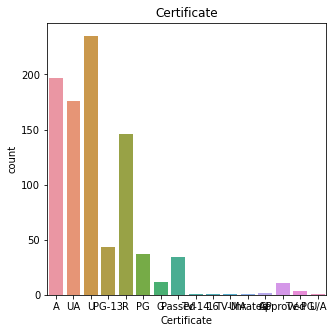

 Here, we are plotted the EDA for Rating Attribute, The EDA is distribution plot


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


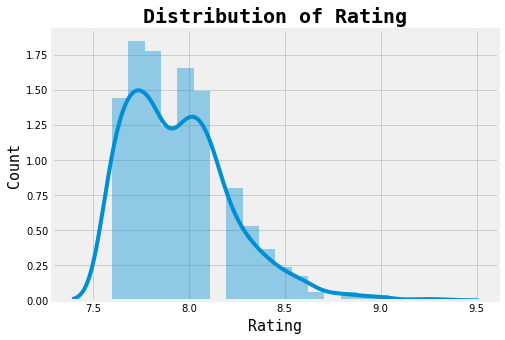

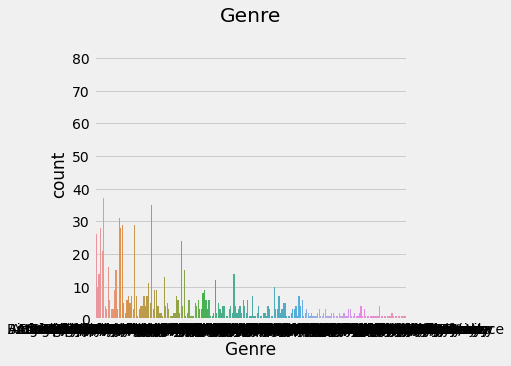

In [24]:
# ================== EDA ======================


print(" Here, we are plotted the EDA for certificate Attribute, it indicates, count of difftent kind of certificates.")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.title("Certificate")
sns.countplot(x='Certificate',data=df_merged)
plt.show()

# -------------------------------------

print(" Here, we are plotted the EDA for Rating Attribute, The EDA is distribution plot")


# Creating a distribution plot for 'Age'
age = df_merged['Rating'].value_counts()

plt.figure(figsize=(8, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df_merged['Rating'], bins=20)
plt.title('Distribution of Rating', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Rating', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

# -------------------------------------


plt.figure(figsize=(5, 5))
plt.title("Genre")
sns.countplot(x='Genre',data=df_merged)
plt.show()


In [25]:
# --------------------------------- Phase 4

# ===== DATA PREPROCESSING ======

print("------------------------------------")
print("Before Checking Missing Values")
print("------------------------------------")
print()
print(df_merged.isnull().sum())

df_merged=df_merged.fillna(0)

print("------------------------------------")
print("After Checking Missing Values")
print("------------------------------------")
print()
print(df_merged.isnull().sum())

# ===== LABEL ENCODING =======


from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder() 

df_merged['MovieName']=label_encoder.fit_transform(df_merged['MovieName'])    


df_merged['DirectorName']=label_encoder.fit_transform(df_merged['DirectorName'])  

df_merged['Certificate']=label_encoder.fit_transform(df_merged['Certificate'].astype(str)  )

df_merged['Star1']=label_encoder.fit_transform(df_merged['Star1'])  

df_merged['Star2']=label_encoder.fit_transform(df_merged['Star2'])  

df_merged['Star3']=label_encoder.fit_transform(df_merged['Star3'])  

df_merged['Star4']=label_encoder.fit_transform(df_merged['Star4'])  

df_merged['Genre']=label_encoder.fit_transform(df_merged['Genre'])  


df_merged['Gross']=df_merged['Gross'].str.replace(',','')

df_merged['Duration']=df_merged['Duration'].str.replace('min','')

df_merged['Year']=df_merged['Year'].str.replace('PG','1978')

# df_merged['Year']=df_merged['Year'].str.replace('PG','1978')

------------------------------------
Before Checking Missing Values
------------------------------------

SNO               0
MovieName         0
Year              0
Duration          0
Rating            0
Meta_score      159
DirectorName      0
Certificate     101
Star1             0
Star2             0
Star3             0
Star4             0
Votes             0
Gross             0
popularity        0
Genre             0
dtype: int64
------------------------------------
After Checking Missing Values
------------------------------------

SNO             0
MovieName       0
Year            0
Duration        0
Rating          0
Meta_score      0
DirectorName    0
Certificate     0
Star1           0
Star2           0
Star3           0
Star4           0
Votes           0
Gross           0
popularity      0
Genre           0
dtype: int64


In [26]:
#===== DATA SPLITTING ======

from sklearn.model_selection import train_test_split

# ----------- VOTE --------------

x=df_merged.drop(['Votes','Gross'],axis=1)
y=df_merged['Votes']

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.10,random_state=1)

print("----------------------------------------------")
print(" Data Splitting")
print("----------------------------------------------")
print()

print("Total number of rows in dataset       :", df_merged.shape[0])
print()
print("Total number of rows in training data :", X_train.shape[0])
print()
print("Total number of rows in testing data :", X_test.shape[0])


# ----------- GROSS --------------

x1=df_merged.drop(['Gross'],axis=1)
y1=df_merged['Gross']

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x1,y1,test_size=0.10,random_state=1)

print("----------------------------------------------")
print(" Data Splitting")
print("----------------------------------------------")
print()

print("Total number of rows in dataset       :", df_merged.shape[0])
print()
print("Total number of rows in training data :", X_train1.shape[0])
print()
print("Total number of rows in testing data :", X_test1.shape[0])


----------------------------------------------
 Data Splitting
----------------------------------------------

Total number of rows in dataset       : 1002

Total number of rows in training data : 901

Total number of rows in testing data : 101
----------------------------------------------
 Data Splitting
----------------------------------------------

Total number of rows in dataset       : 1002

Total number of rows in training data : 901

Total number of rows in testing data : 101


In [27]:
# =============== MACHINE LEARNING ============
    
# ---- LR (VOTE)


from sklearn import linear_model
from sklearn import metrics

lr = linear_model.LogisticRegression()

lr.fit(X_train, Y_train)

pred_lr=lr.predict(X_test)

acc_lr=metrics.accuracy_score(Y_test,pred_lr)*100

print("------------------------------------------------")
print("Performance Analysis (LR)")
print("------------------------------------------------")
print()
print("1. Accuracy :",acc_lr *100 )
print()
# print("Classification Report")
# print(metrics.classification_report(Y_test,pred_lr))

pred_lr=pd.DataFrame(pred_lr)    
    
pred_lr.to_csv('Votes.csv')    
 
print()
print("----------------------------------------------------------")
print()



# ---- LR (VOTE)

from sklearn import linear_model
from sklearn import metrics

lr = linear_model.LogisticRegression()

lr.fit(X_train1, Y_train1)

pred_lr1=lr.predict(X_test1)

acc_lr1=metrics.accuracy_score(Y_test1,pred_lr1)*100

print("------------------------------------------------")
print("Performance Analysis (LR)")
print("------------------------------------------------")
print()
print("1. Accuracy :",acc_lr1 )
print()
# print("Classification Report")
# print(metrics.classification_report(Y_test,pred_lr))

pred_lr1=pd.DataFrame(pred_lr1)    
    
pred_lr1.to_csv('Gross.csv')        
    
    
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso l2 ridge

logreg=linear_model.LogisticRegression()

logreg_cv=GridSearchCV(logreg,grid,cv=10)

logreg_cv.fit(X_train1, Y_train1)

y_pred_lr = logreg_cv.predict(X_train1)

from sklearn import metrics

acc_lr=metrics.accuracy_score(y_pred_lr,Y_train1)*100


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------------------------------------------------
Performance Analysis (LR)
------------------------------------------------

1. Accuracy : 99.00990099009901


----------------------------------------------------------



C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


------------------------------------------------
Performance Analysis (LR)
------------------------------------------------

1. Accuracy : 13.861386138613863



C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c